In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
# read the csv file 
df = pd.read_csv('/home/samim/insurance_data.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
try:
    %tensorflow_version 2.x  #google colab only
except Exception:
    pass

import tensorflow as tf
print(tf.__version__)

2.14.0


In [5]:
# check if there are any Null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# Check unique values in the 'sex' column
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [7]:
df['sex'] = df['sex'].apply(lambda x: 0 if x == 'female' else 1)

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [8]:
df['smoker'] = df['smoker'].apply( lambda x: 0 if x == 'no' else 1)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [9]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
pd.get_dummies(df['region'], drop_first=False, dtype=int)

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [11]:
pd.get_dummies(df['region'], drop_first=True, dtype=int)

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [12]:
region_dummies = pd.get_dummies(df['region'], drop_first=True, dtype=int)
region_dummies

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [13]:
df = pd.concat([df, region_dummies], axis='columns')
df

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,1,0,0
1334,18,0,31.920,0,0,northeast,2205.98080,0,0,0
1335,18,0,36.850,0,0,southeast,1629.83350,0,1,0
1336,21,0,25.800,0,0,southwest,2007.94500,0,0,1


In [14]:
df.drop(['region'], axis = 1, inplace = True)
df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [15]:
X = df.drop(columns =['charges'])
y = df['charges']

X

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,0,0
1334,18,0,31.920,0,0,0,0,0
1335,18,0,36.850,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,1


In [16]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [17]:
y = y.reshape(-1,1)

In [18]:
X

array([[19.  ,  0.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [21.  ,  0.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  0.  , 29.07, ...,  1.  ,  0.  ,  0.  ]], dtype=float32)

In [19]:
y

array([[16884.924 ],
       [ 1725.5522],
       [ 4449.462 ],
       ...,
       [ 1629.8335],
       [ 2007.945 ],
       [29141.36  ]], dtype=float32)

In [20]:
X.shape

(1338, 8)

In [21]:
y.shape

(1338, 1)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33)

In [23]:
N , D = X_train.shape

In [24]:
N , D

(896, 8)

In [25]:
X_test.shape

(442, 8)

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [30]:
#Alternative
#model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Dense(1, activation='sigmoid',input_shape=(D,)))

In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
28/28 [==============================] - 8s 75ms/step - loss: -2772.9685 - accuracy: 0.0000e+00 - val_loss: -6846.2290 - val_accuracy: 0.0000e+00
Epoch 2/100
28/28 [==============================] - 1s 29ms/step - loss: -3462.3032 - accuracy: 0.0000e+00 - val_loss: -7689.7920 - val_accuracy: 0.0000e+00
Epoch 3/100
28/28 [==============================] - 1s 34ms/step - loss: -4151.0234 - accuracy: 0.0000e+00 - val_loss: -8521.0029 - val_accuracy: 0.0000e+00
Epoch 4/100
28/28 [==============================] - 0s 4ms/step - loss: -4833.9165 - accuracy: 0.0000e+00 - val_loss: -9398.3721 - val_accuracy: 0.0000e+00
Epoch 5/100
28/28 [==============================] - 0s 3ms/step - loss: -5536.2358 - accuracy: 0.0000e+00 - val_loss: -10224.1172 - val_accuracy: 0.0000e+00
Epoch 6/100
28/28 [==============================] - 0s 3ms/step - loss: -6222.8320 - accuracy: 0.0000e+00 - val_loss: -11058.3184 - val_accuracy: 0.0000e+00
Epoch 7/100
28/28 [==============================] - 

In [33]:
print('Train Score:', model.evaluate(X_train, y_train))
print('Test Score:', model.evaluate(X_test, y_test))


28/28 [==============================] - 1s 20ms/step - loss: -71264.6250 - accuracy: 0.0000e+00
Train Score: [-71264.625, 0.0]
14/14 [==============================] - 0s 7ms/step - loss: -89961.7656 - accuracy: 0.0000e+00
Test Score: [-89961.765625, 0.0]


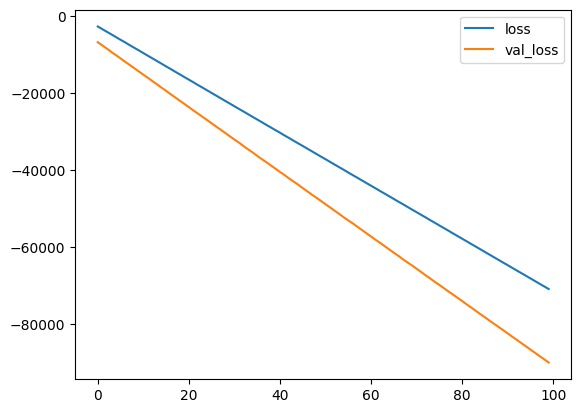

In [35]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

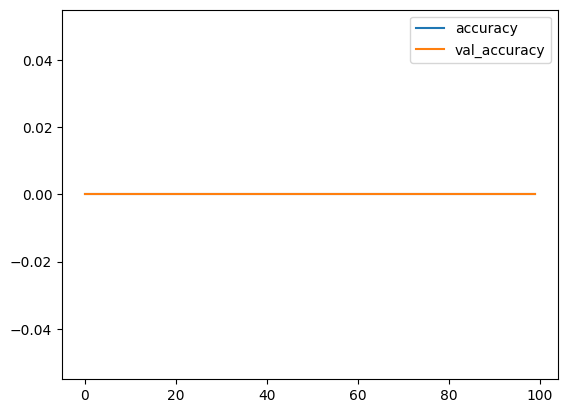

In [36]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend();